In [ ]:
# Import dataset from Kaggle
import kagglehub
arnavs19_underwater_plastic_pollution_detection_path = kagglehub.dataset_download('arnavs19/underwater-plastic-pollution-detection')

print('Data source import complete.')


In [ ]:
#necessary libraries
from fastai.vision.all import *
import pandas as pd
import kagglehub

In [ ]:
# Download latest version
path = kagglehub.dataset_download("arnavs19/underwater-plastic-pollution-detection")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/underwater-plastic-pollution-detection


In [ ]:
#read from the path
from pathlib import Path
path = Path('/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics')
# Labels of first 10 training images
real_files = list((path/'train/images').glob("*.jpg"))
real_files[:10]

[Path('/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/train/images/uwg_yt-40__fliph_jpg.rf.f91d5494c350a9fae0dc5cc91d8e7dee.jpg'),
 Path('/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/train/images/1601024846172-gettyimagkjhes-1--227745665_jpeg_jpg.rf.07cc25aa58a493530b6b19976f04ac6b.jpg'),
 Path('/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/train/images/uwg_g-986__fliph_jpg.rf.58fa59b2cd322fa207a339a23894ee31.jpg'),
 Path('/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/train/images/20211007104805_jpg.rf.7e906a628f8d86fffc038e5d6c961202.jpg'),
 Path('/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/train/images/uwg_g-443_jpg.rf.90da8fdbd63db58dfbcfff4ec2b97f05.jpg'),
 Path('/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/train/images/uwg_g-896__fliph_jpg.rf.1ccdd44167e763dc88da85fb6c9f373d.jpg'),
 Path('/kaggle/input/underwater-plast

In [ ]:
#extract image and label
from pathlib import Path

path_labels=[]

for split in ['train', 'valid']:
  # pointers for the image and label classes
    image_dir = path/f'{split}/images'
    label_dir = path/f'{split}/labels'

    for img_file in image_dir.iterdir():
        lbl_file = label_dir/f'{img_file.stem}.txt'

        if not lbl_file.exists():
            continue  #skip unlabeled images

        content = lbl_file.read_text().strip().split()
        if not content:
            continue  #skip empty label files

        cls = int(content[0])  # First token (class ID)
        path_labels.append([str(img_file), cls])

print(len(path_labels))

4626


In [ ]:
# putting the data in a data frame
df = pd.DataFrame(path_labels, columns=['image', 'label'])
df.head()

,image,label
0,/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/train/images/uwg_yt-40__fliph_jpg.rf.f91d5494c350a9fae0dc5cc91d8e7dee.jpg,7
1,/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/train/images/1601024846172-gettyimagkjhes-1--227745665_jpeg_jpg.rf.07cc25aa58a493530b6b19976f04ac6b.jpg,0
2,/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/train/images/uwg_g-986__fliph_jpg.rf.58fa59b2cd322fa207a339a23894ee31.jpg,10
3,/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/train/images/20211007104805_jpg.rf.7e906a628f8d86fffc038e5d6c961202.jpg,0
4,/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/train/images/uwg_g-443_jpg.rf.90da8fdbd63db58dfbcfff4ec2b97f05.jpg,2


In [19]:
class_names=['Mask', 'can', 'cellphone', 'electronics', 'gbottle', 'glove',
           'metal', 'misc', 'net', 'pbag', 'pbottle', 'plastic', 'rod',
           'sunglasses', 'tire']

# Replace numeric labels with class names
df['label'] = df['label'].map(lambda x:class_names[x])

df.head()


,image,label
0,/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/train/images/uwg_yt-40__fliph_jpg.rf.f91d5494c350a9fae0dc5cc91d8e7dee.jpg,misc
1,/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/train/images/1601024846172-gettyimagkjhes-1--227745665_jpeg_jpg.rf.07cc25aa58a493530b6b19976f04ac6b.jpg,Mask
2,/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/train/images/uwg_g-986__fliph_jpg.rf.58fa59b2cd322fa207a339a23894ee31.jpg,pbottle
3,/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/train/images/20211007104805_jpg.rf.7e906a628f8d86fffc038e5d6c961202.jpg,Mask
4,/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/train/images/uwg_g-443_jpg.rf.90da8fdbd63db58dfbcfff4ec2b97f05.jpg,cellphone


In [20]:
#data block for data loading
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=ColReader('image'),
    get_y=ColReader('label'),
    splitter=RandomSplitter(0.2),
    item_tfms=Resize(224)
)

#data loader
dls = dblock.dataloaders(df)

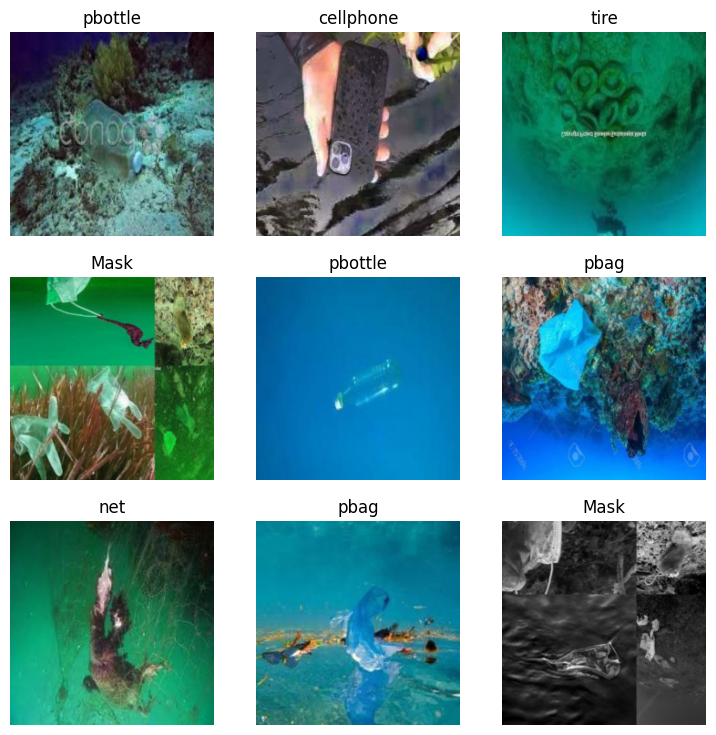

In [21]:
#viewing 9 samples from the data
dls.show_batch(max_n=9)

In [22]:
#selecting the pretrained model
learn = vision_learner(dls, resnet34, metrics=accuracy)

In [23]:
#finetuning the model
learn.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,2.195295,0.886623,0.748108,00:25


epoch,train_loss,valid_loss,accuracy,time
0,0.824205,0.564344,0.825946,00:29
1,0.422461,0.434609,0.859459,00:28
2,0.196766,0.396912,0.871351,00:27
